In [3]:
#Clear Vars
#import sys
#sys.modules[__name__].__dict__.clear()

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import email.utils as eutils
import time

import eppy as eppy
from eppy import modeleditor
from eppy.modeleditor import IDF
from eppy.runner.run_functions import runIDFs
import PySimpleGUI as sg
from PIL import Image
import os

import subprocess
import os
from os import system

import pprint
pp = pprint.PrettyPrinter()


See above included libraries

#Title
-stuff

In [5]:

#Inputs for this to function as a tool
cases = 12
BaseFileName = "Resilience"
start_date = '2020-01-26 00:00:00'
end_date = '2020-02-04 00:00:00'
start_date2 = '2020-07-19 00:00:00'
end_date2 = '2020-07-30 00:00:00'

In [6]:
#Import iterations from run list file

testingFile = "C:\\ResilienceTest_v1\\" + str(BaseFileName) + ".idf"

if os.path.exists(testingFile):
    os.remove(testingFile)

iddfile = "C:\EnergyPlusV9-5-0\Energy+.idd"
IDF.setiddname(iddfile)
epwfile = "C:\\ResilienceTest_v1\\USA_IL_Chicago.Midway.Intl.AP.725340_TMY3.epw"
fname1 = 'C:\\ResilienceTest_v1\\00_SF Base v1.idf'
runList = "runs.csv"
idf1 = IDF(fname1)
idf1.saveas(str(testingFile))
fname2 = "C:\\ResilienceTest_v1\\" + str(BaseFileName) + ".idf"
idf2 = IDF(fname2)

os.chdir("C:\ResilienceTest_v1")
df = pd.read_csv(runList)
RunNames = pd.read_csv(runList)
df = df.fillna('')
#df = df.dropna()
length = df.shape

CaseName = df["RunName"].tolist()

iterations = length[0] + 1
df.head(15)

,RunName,WindowConstruction,ExteriorWall,FloorConstruction,RoofConstruction,FlowCoefficient,SHGC,ERVSensibleRecovery,ervSchedule,NatVentType,NatVentAvail,ShadingAvailible,EvapCoolerAvail,DehumidifierAvail,HeatPumpAvail,StemWall,OutStartH,OutEndH,OutStartC,OutEndC
0,Package_0_Base House_,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148491,0.4,0.75,Always Off,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
1,Package_1_Base House_HP,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
2,Package_1_Base House Double Hung_HP,Exterior Window 0.35,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
3,Package_1_Base House + ERV 0.8_HP,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
4,Package_1_Base House DH + ERV 0.8_HP,Exterior Window 0.35,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
5,Package_2_Base House_HP,Exterior Window 0.36,Exterior Wall +1.625in EPS,Exterior Slab UnIns,Exterior Roof R-60,0.092920,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
6,Package_2_Base House DH_HP,Exterior Window 0.28,Exterior Wall +1.625in EPS,Exterior Slab UnIns,Exterior Roof R-60,0.092920,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
7,Package_2_Base House + ERV 0.8_HP,Exterior Window 0.36,Exterior Wall +1.625in EPS,Exterior Slab UnIns,Exterior Roof R-60,0.092920,0.4,0.80,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
8,Package_2_Base House DH + ERV 0.8_HP,Exterior Window 0.28,Exterior Wall +1.625in EPS,Exterior Slab UnIns,Exterior Roof R-60,0.092920,0.4,0.80,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
9,Package_3_IECC 2021_HP,Exterior Window 0.3,Exterior Wall +2in EPS,Exterior Slab UnIns,Exterior Roof R-60,0.038210,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26


In [7]:
#add parametrics to idf file

runs = [*range(1,iterations,1)]
#print(runs)

runs = df['WindowConstruction']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$WindowConstruction',
**values)

runs = df['ExteriorWall']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$ExteriorWall',
**values)

runs = df['SHGC']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$SHGC',
**values)

runs = df['ERVSensibleRecovery']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$ERVSense',
**values)

runs = df['FloorConstruction']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$FloorConstruction',
**values)

runs = df['RoofConstruction']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$RoofConstruction',
**values)

runs = df['FlowCoefficient']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$Infiltration',
**values)

runs = df['ervSchedule']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$ERVSch',
**values)

runs = df['NatVentAvail']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$NV',
**values)

runs = df['NatVentAvail']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$SNV',
**values)

runs = df['NatVentType']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$NatVentType',
**values)

runs = df['ShadingAvailible']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$Shading',
**values)

runs = df['EvapCoolerAvail']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$ECSch',
**values)

runs = df['HeatPumpAvail']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$HPSch',
**values)

runs = df['DehumidifierAvail']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$DXDHSch',
**values)

runs = df['RunName']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$Name',
**values)

runs = df['StemWall']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$StemWall',
**values)

runs = df['OutStartH']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$OutStartH',
**values)

runs = df['OutStartC']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$OutStartC',
**values)

runs = df['OutEndH']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$OutEndH',
**values)

runs = df['OutEndC']
params = [x for x in runs]
values = {}
for i,param in enumerate(params):
    values['Value_for_Run_' + str(i+1)] = param
idf2.newidfobject('Parametric:SetValueForRun',
Name = '$OutEndC',
**values)

idf2.saveas('C:\ResilienceTest_v1\Resilience.idf')

df.head()

,RunName,WindowConstruction,ExteriorWall,FloorConstruction,RoofConstruction,FlowCoefficient,SHGC,ERVSensibleRecovery,ervSchedule,NatVentType,NatVentAvail,ShadingAvailible,EvapCoolerAvail,DehumidifierAvail,HeatPumpAvail,StemWall,OutStartH,OutEndH,OutStartC,OutEndC
0,Package_0_Base House_,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148491,0.4,0.75,Always Off,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
1,Package_1_Base House_HP,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
2,Package_1_Base House Double Hung_HP,Exterior Window 0.35,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
3,Package_1_Base House + ERV 0.8_HP,Exterior Window 0.47,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26
4,Package_1_Base House DH + ERV 0.8_HP,Exterior Window 0.35,Exterior Wall,Exterior Slab UnIns,Exterior Roof,0.148490,0.4,0.65,Always On,Nat Vent,1,0,Always Off,Always Off,OutageAnnual,EPS 2in,Through: 01/26,Through: 02/02,Through: 07/19,Through: 07/26


In [8]:
"""
subprocess.call("C:\\EnergyPlusV9-5-0\\PreProcess\\ParametricPreProcessor\\ParametricPreprocessor.exe")
subprocess.call(["C:\\EnergyPlusV9-5-0\\PreProcess\\ParametricPreProcessor\\ParametricPreprocessor.exe", "C:\\ResilienceTest_v1\\Resilience.idf"])

runs = range(cases)
for n in runs:
    name = ("C:\\ResilienceTest_v1\\" + str(BaseFileName) + "-" + str(n+1).rjust(6, "0")+ ".idf")
    idf = IDF(name, epwfile)
    idf.run()

"""

wait = input("Press Enter to continue.")


In [16]:
results = []
runs = range(iterations-1)
print(cases)
print(runs)
print(iterations)
df = dict()
df1 = pd.DataFrame()

for n in runs:
    name = ("C:\\ResilienceTest_v1\\" + str(BaseFileName) + "-" + str(n+1).rjust(6, '0') + ".csv")
    name2 = str(CaseName[n-1])
    results.append(name)
    df[n] = pd.read_csv(results[n])
    df1["Date/Time"] = df[n]["Date/Time"]
    df1[str(name2) + "Zone Air Temp"] = df[n]["ZONE 1:Zone Air Temperature [F](Hourly)"]
    df1[str(name2) + "Zone RH"] = df[n]['ZONE 1:Zone Air Relative Humidity [%](Hourly)']
    df1["Site Dry Bulb [F]"] = df[n]['Environment:Site Outdoor Air Drybulb Temperature [F](Hourly)']


12
range(0, 12)
13


In [10]:
df1 = df1

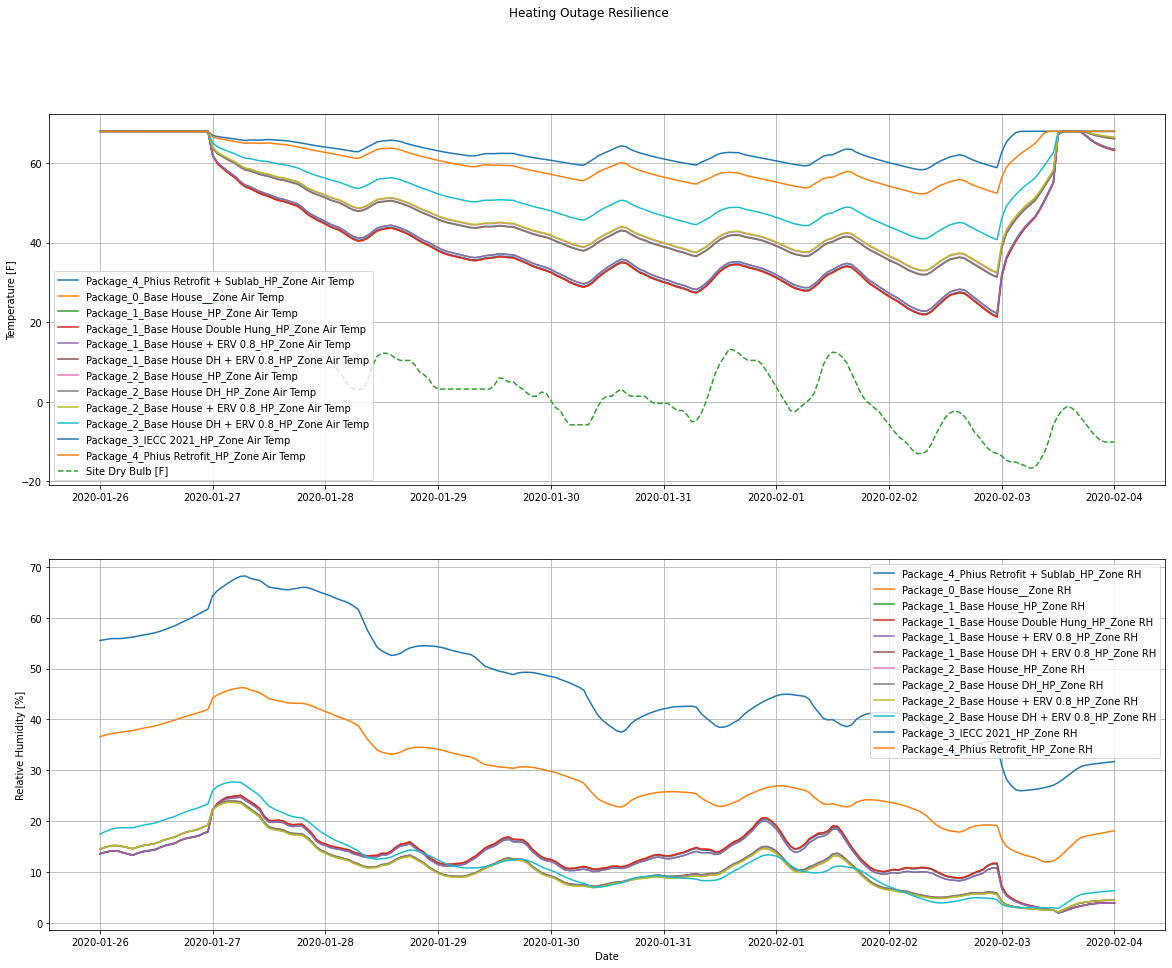

In [17]:
#Plot Heating Outage

df1.rename(columns = {'Date/Time':'DateTime'}, inplace = True)
df1[['Date2','Time']] = df1.DateTime.str.split(expand=True)
df1['Date'] = df1['Date2'].map(str) + '/' + str(2020)
df1['Time'] = (pd.to_numeric(df1['Time'].str.split(':').str[0])-1).astype(str).apply(lambda x: f'0{x}' if len(x)==1 else x) + df1['Time'].str[2:]
df1['DateTime'] = df1['Date'] + ' ' + df1['Time']
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

endWarmup = int((df1[df1['DateTime'] == '2020-01-01 00:00:00'].index.values))
dropWarmup = [*range(0, endWarmup,1)]

df1 = df1.drop(index = dropWarmup)
df1 = df1.reset_index()

mask = (df1['DateTime'] >= start_date) & (df1['DateTime'] <= end_date)

dfh = df1.loc[mask]

x = dfh['DateTime']
db = dict()
rh = dict()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
fig.suptitle('Heating Outage Resilience')

for n in runs:
    db[n] = dfh[str(CaseName[n-1]) + "Zone Air Temp"]
    rh[n] = dfh[str(CaseName[n-1])+ "Zone RH"]

    ax1.plot(x,db[n], label=(str(CaseName[n-1]) + "_Zone Air Temp"))
    ax2.plot(x,rh[n], label=(str(CaseName[n-1]) + "_Zone RH"))

#Plot site temp    
ax1.plot(x,dfh["Site Dry Bulb [F]"], label="Site Dry Bulb [F]", linestyle='dashed')

ax1.set_ylabel('Temperature [F]')
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Date')
ax2.set_ylabel('Relative Humidity [%]')
ax2.legend()
ax2.grid(True)

plt.savefig(str(BaseFileName) + "_Heating Outage Resilience Graphs.png")


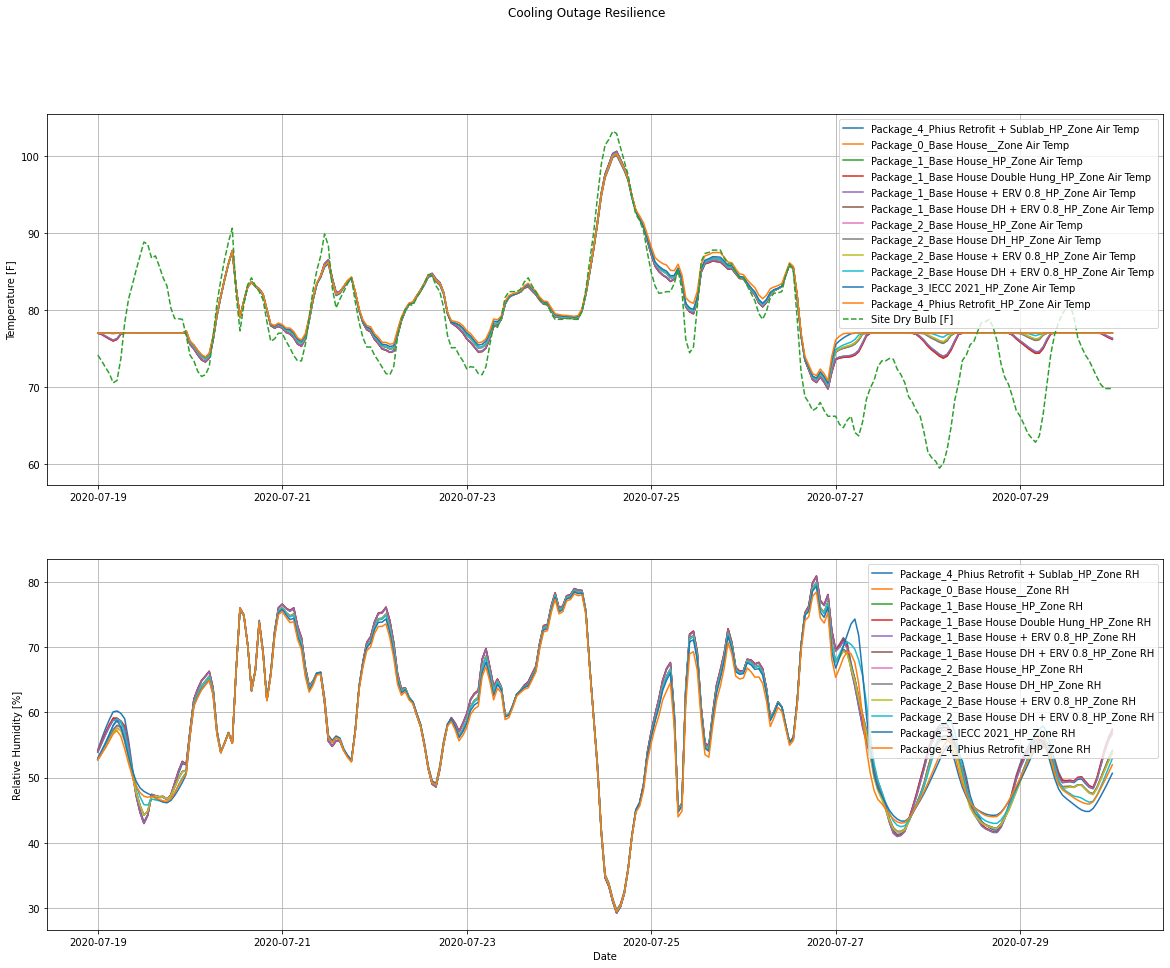

In [12]:
#Plot Cooling Outage
mask = (df1['DateTime'] >= start_date2) & (df1['DateTime'] <= end_date2)

dfh = df1.loc[mask]

x = dfh['DateTime']
db = dict()
rh = dict()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
fig.suptitle('Cooling Outage Resilience')

for n in runs:
    db[n] = dfh[str(CaseName[n-1]) + "Zone Air Temp"]
    rh[n] = dfh[str(CaseName[n-1]) + "Zone RH"]
#plot zone results
    ax1.plot(x,db[n], label=(str(CaseName[n-1]) + "_Zone Air Temp"))
    ax2.plot(x,rh[n], label=(str(CaseName[n-1]) + "_Zone RH"))
#Plot site temp    
ax1.plot(x,dfh["Site Dry Bulb [F]"], label="Site Dry Bulb [F]", linestyle='dashed')

ax1.set_ylabel('Temperature [F]')
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Date')
ax2.set_ylabel('Relative Humidity [%]')
ax2.legend()
ax2.grid(True)

plt.savefig(str(BaseFileName) + "_Cooling Outage Resilience Graphs.png")




In [13]:
from eppy.results import readhtml # the eppy module with functions to read the html

results = []
HeatingSET = []
Caution = []
ExtremeCaution = []
Danger = []
ExtremeDanger = []
Below2C = []

for n in runs:
    fname = ("C:\\ResilienceTest_v1\\" + str(BaseFileName) + "-" + str(n+1).rjust(6, '0') + "Table.html")
    results.append(fname)
    filehandle = open(fname, 'r').read()

    htables = readhtml.titletable(filehandle) # reads the tables with their titles

    SETh = htables[178]
    item_title = SETh[0]
    item_table = SETh[1]
    row = item_table[1] # we start counting with 0. So 0, 1, 2 is third row
    value = row[1]
    HeatingSET.append(float(value))

    Caut = htables[174]
    item_title = Caut[0]
    item_table = Caut[1]
    row = item_table[1] # we start counting with 0. So 0, 1, 2 is third row
    value = row[2]
    Caution.append(float(value))

    ExCaut = htables[174]
    item_title = ExCaut[0]
    item_table = ExCaut[1]
    row = item_table[1] # we start counting with 0. So 0, 1, 2 is third row
    value = row[3]
    ExtremeCaution.append(float(value))

    Dang = htables[174]
    item_title = Dang[0]
    item_table = Dang[1]
    row = item_table[1] # we start counting with 0. So 0, 1, 2 is third row
    value = row[4]
    Danger.append(float(value))

    ExDang = htables[174]
    item_title = ExDang[0]
    item_table = ExDang[1]
    row = item_table[1] # we start counting with 0. So 0, 1, 2 is third row
    value = row[5]
    ExtremeDanger.append(float(value))

    Freeze = htables[184]
    item_title = Freeze[0]
    item_table = Freeze[1]
    row = item_table[39] # we start counting with 0. So 0, 1, 2 is third row
    value = row[2]
    Below2C.append(float(value))


ResultsTable = pd.DataFrame()
ResultsTable["Run Name"] = RunNames["RunName"]
ResultsTable["SET ≤ 12.2°C Hours (F)"] = HeatingSET
ResultsTable["Hours < 2°C [hr]"] = Below2C
ResultsTable["Caution (> 26.7, ≤ 32.2°C) [hr]"] = Caution
ResultsTable["Extreme Caution (> 32.2, ≤ 39.4°C) [hr]"] = ExtremeCaution
ResultsTable["Danger (> 39.4, ≤ 51.7°C) [hr]"] = Danger
ResultsTable["Extreme Danger (> 51.7°C) [hr]"] = ExtremeDanger


ResultsTable.head()

ResultsTable.to_csv("C:\\ResilienceTest_v1\\" + str(BaseFileName) + "_ResultsTable.csv")



KeyboardInterrupt: 